## Customer Shopping Trends

### Exploratory Data Analysis - We are going to load the data. Do cleaning if it is needed. Crearte visiualizations

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Loading data into dataframe
data = pd.read_csv('shopping_trends_updated.csv')

In [35]:
# Finds the number of columns and rows of our lovely dataframe
data.shape

(3900, 18)

In [36]:
# Let's look at first 5 rows and understand what kind of data we have
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [37]:
# Information about each column. Their data type; The number of values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [38]:
# Check if we have null values or not
data.isnull().sum().sum()

0

In [39]:
# Print age of youngest and oldest customers
print(f"The oldest customer's age: {data['Age'].max()}")
print(f"The youngest customer's age: {data['Age'].min()}")


The oldest customer's age: 70
The youngest customer's age: 18


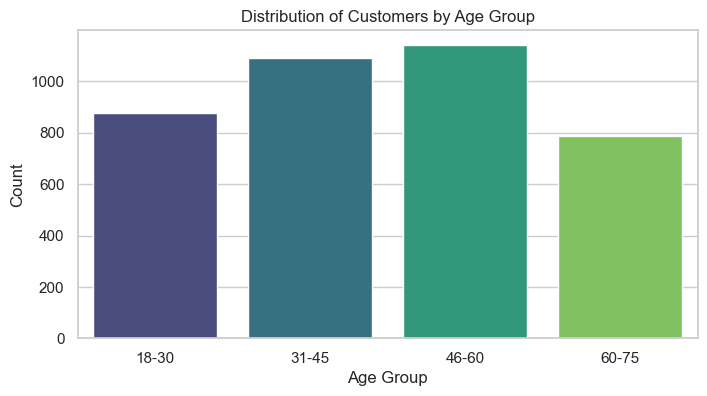

In [44]:
# Create age groups and visiualize
age_bins = [18, 30, 45, 60, 75]  # Adjusting the bins
age_labels = ['18-30', '31-45', '46-60', '60-75']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(8, 4))
sns.countplot(x='Age Group', data=data, palette='viridis')
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


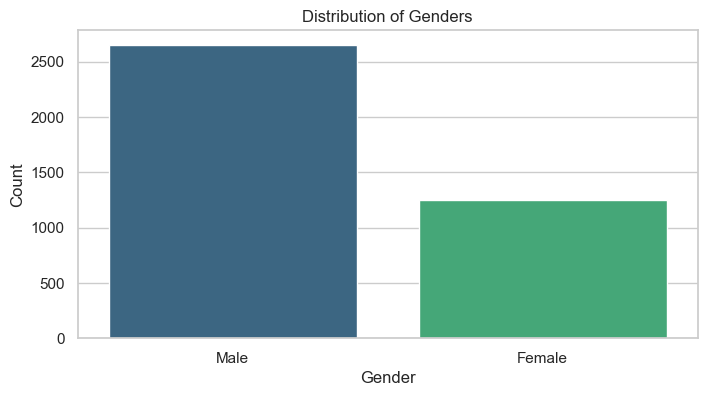

In [64]:
# Shows distribution of genders among customers
plt.figure(figsize=(8,4))
sns.countplot(x = 'Gender', data=data, palette='viridis')
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [45]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,46-60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-30
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,46-60


In [66]:
data['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

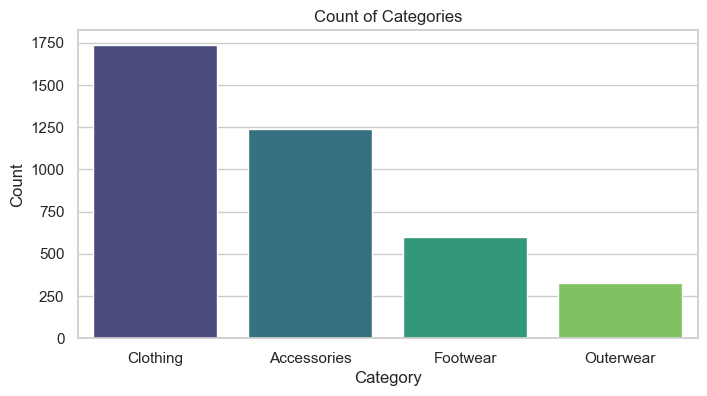

In [79]:
category_counts = data['Category'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title(f'Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [67]:
data['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

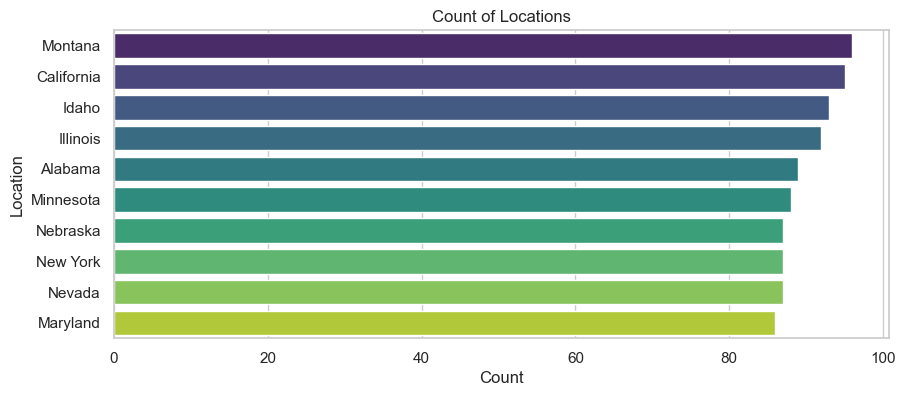

In [91]:
location_counts = data['Location'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(y=location_counts.index, x=location_counts.values, palette='viridis')
plt.title(f'Count of Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [68]:
data['Shipping Type'].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

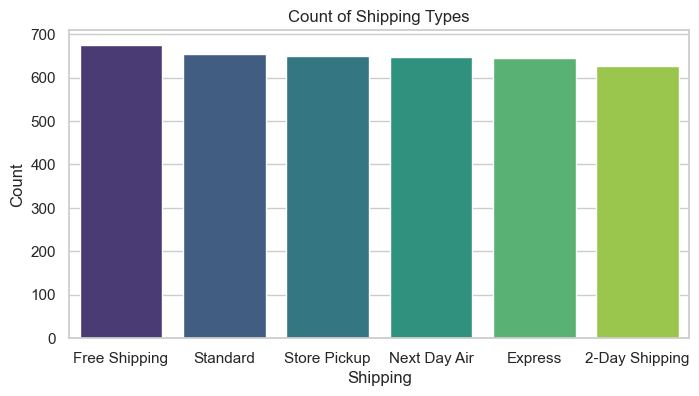

In [92]:
shipping_type_counts = data['Shipping Type'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=shipping_type_counts.index, y=shipping_type_counts.values, palette='viridis')
plt.title(f'Count of Shipping Types')
plt.xlabel('Shipping')
plt.ylabel('Count')
plt.show()

In [69]:
data['Payment Method'].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

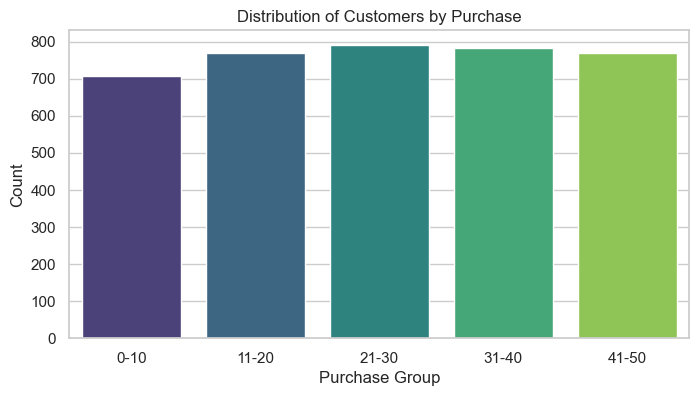

In [73]:
# Create age groups and visiualize
purchase_bins = [0, 10, 20, 30, 40, 50]  # Adjusting the bins
purchase_labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
data['Purchase Group'] = pd.cut(data['Previous Purchases'], bins=purchase_bins, labels=purchase_labels, right=False)

plt.figure(figsize=(8, 4))
sns.countplot(x='Purchase Group', data=data, palette='viridis')
plt.title('Distribution of Customers by Purchase')
plt.xlabel('Purchase Group')
plt.ylabel('Count')
plt.show()


In [76]:
data['Purchase Amount (USD)'].mean()

59.76435897435898